<a href="https://colab.research.google.com/github/niteshavagabond/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cardiovascular Risk Prediction

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). The dataset provides the patients’ information. It includes
over 4,000 records and 15 attributes.


Variables
Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.

Data Description
Demographic:
*  Sex: male or female("M" or "F")
*  Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to
whole numbers, the concept of age is continuous)
Behavioral
*  is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)
Medical( history)
* BP Meds: whether or not the patient was on blood pressure medication (Nominal)
* Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
* Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)
* Tot Chol: total cholesterol level (Continuous)
* Sys BP: systolic blood pressure (Continuous)
* Dia BP: diastolic blood pressure (Continuous)
* BMI: Body Mass Index (Continuous)
* Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)
* Glucose: glucose level (Continuous)
* 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) - Target variable

In [1061]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt




In [1062]:
# mounting google drive
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1063]:
# loading dataset
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Cardiovascular Risk Prediction - Nitesh Verma/data_cardiovascular_risk.csv')

In [1064]:
# top 5 index values
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [1065]:
# last 5 index values
df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [1066]:
# shape of dataset
df.shape

(3390, 17)

In [1067]:
# information regarding dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

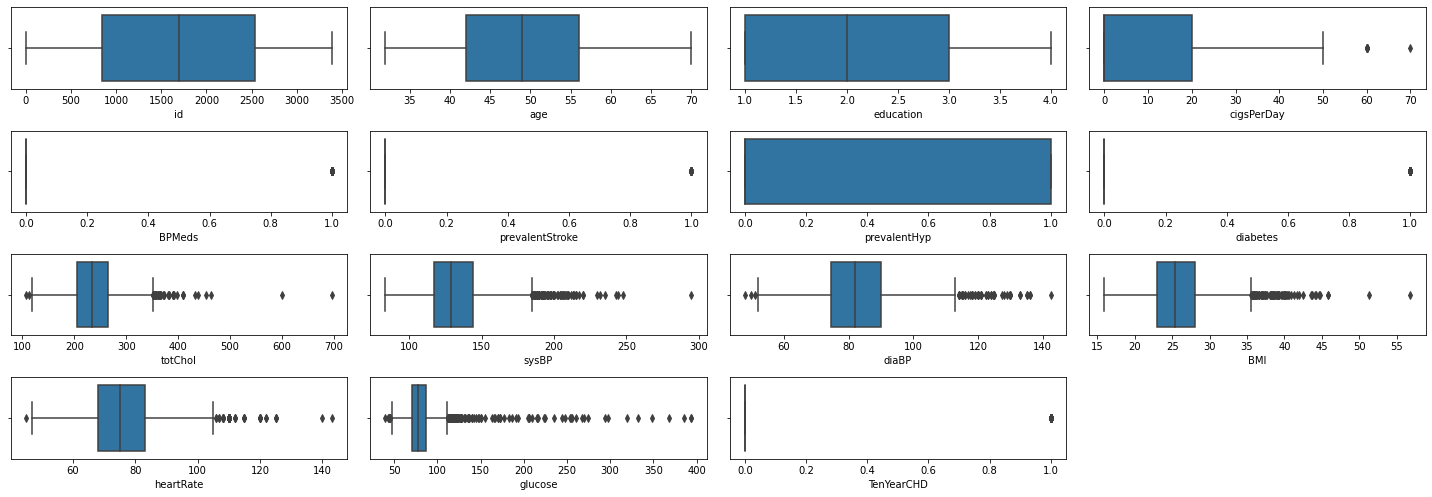

In [1068]:
# looking for outliers of every fearture of dataset with the help of boxplot
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
plt.figure(figsize = (20, 10))
num_it = 1 

for col in df.describe().columns:
    plt.subplot(6,4,num_it)
    sns.boxplot(df[col])
    num_it+=1
    
plt.tight_layout()

# Feature engineering

In [1069]:
# droping irrelevant columns from dataset
df.drop(['id','education'], axis=1, inplace=True) # id and education status of patients are not going to help to predict cardiovascular risk 

In [1070]:
# total null values present in columns
df.isna().sum()

age                  0
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [1071]:
# looking column names, datatype of features, null values, unique values and their number of unique values
df_columns_table=[[name,df[name].dtypes,df[name].isnull().sum(),round(df[name].isnull().sum()/len(df)*100, 2),
                   df[name].nunique(),df[name].unique()] for name in df.columns]
df_columns = pd.DataFrame(df_columns_table, columns = ['Column', 'Dtype', 'Null', 'Null (%)', 'nUnique', 'Unique'])
df_columns

,Column,Dtype,Null,Null (%),nUnique,Unique
0,age,int64,0,0.00,39,"[64, 36, 46, 50, 61, 41, 55, 53, 43, 44, 58, 5..."
1,sex,object,0,0.00,2,"[F, M]"
2,is_smoking,object,0,0.00,2,"[YES, NO]"
3,cigsPerDay,float64,22,0.65,32,"[3.0, 0.0, 10.0, 20.0, 30.0, 35.0, 40.0, 15.0,..."
4,BPMeds,float64,44,1.30,2,"[0.0, nan, 1.0]"
5,prevalentStroke,int64,0,0.00,2,"[0, 1]"
6,prevalentHyp,int64,0,0.00,2,"[0, 1]"
7,diabetes,int64,0,0.00,2,"[0, 1]"
8,totChol,float64,38,1.12,240,"[221.0, 212.0, 250.0, 233.0, 241.0, 272.0, 238..."
9,sysBP,float64,0,0.00,226,"[148.0, 168.0, 116.0, 158.0, 136.5, 182.0, 232..."


Going through every column, checking their null values and also replacing and removing outliers from every columns if any. 

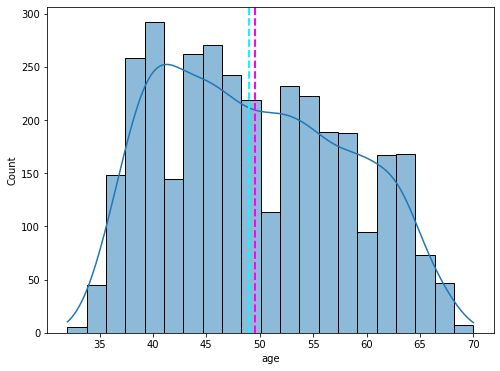

In [1072]:
# age column distribution, mean and median line in histogram plot
plt.figure(figsize=(8,6))
ax=sns.histplot(df['age'],kde =True)
ax.axvline(df['age'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(df['age'].median(), color='cyan', linestyle='dashed', linewidth=2)

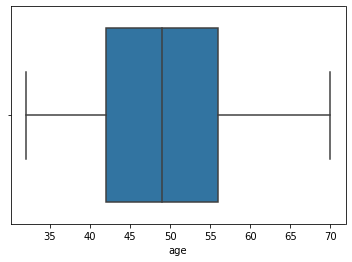

In [1073]:
# checking outliers of age column through boxplot
plt.figure(figsize=(6,4))
sns.boxplot(df['age'])

F    1923
M    1467
Name: sex, dtype: int64

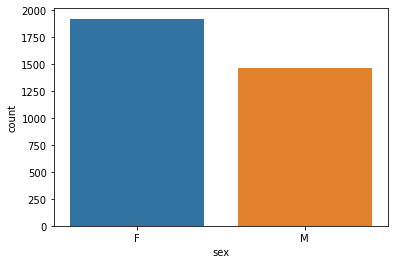

In [1074]:
# showing countplot of sex column and its value counts
plt.figure(figsize=(6,4))
sns.countplot(df['sex'])
df['sex'].value_counts()

In [1075]:
# Categorical encoding for sex column (1='male' and 2 ='female')
df['sex'].replace({'F':2,'M':1},inplace=True)

NO     1703
YES    1687
Name: is_smoking, dtype: int64

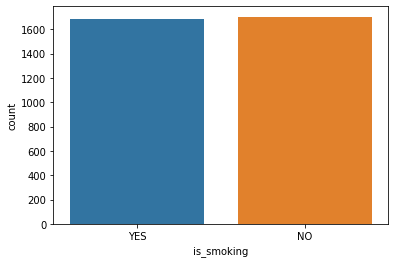

In [1076]:
# countplot of smoking status and its value counts
plt.figure(figsize=(6,4))
sns.countplot(df['is_smoking'])
df['is_smoking'].value_counts()

In [1077]:
# Categorical encoding for smoking column (0='NO' and 1 ='YES')
df['is_smoking'].replace({'YES':1,'NO':0},inplace=True)

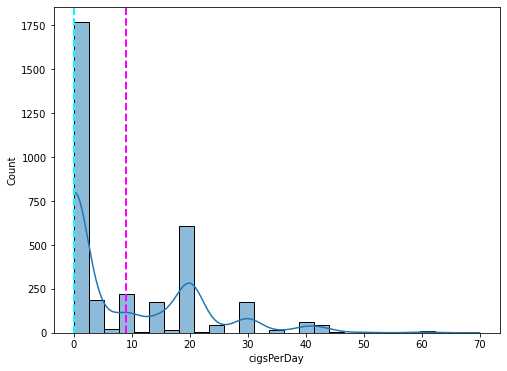

In [1078]:
# Cigrates per day column distribution, mean and median line in histogram plot
plt.figure(figsize=(8,6))
ax = sns.histplot(df['cigsPerDay'],kde=True)
ax.axvline(df['cigsPerDay'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(df['cigsPerDay'].median(), color='cyan', linestyle='dashed', linewidth=2)

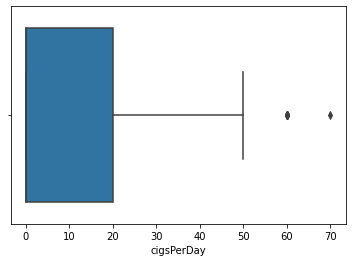

In [1079]:
# checking outliers of Cigrates per day column through boxplot
sns.boxplot(df['cigsPerDay'])

In [1080]:
# Replacing null values of cigrates per day column with mean
df['cigsPerDay'] = df['cigsPerDay'].fillna(df['cigsPerDay'].mean())

In [1081]:
# Checking outliers of cigrates per day through IQR, upper fence and lower fence 
iqr = np.percentile(df['cigsPerDay'],75) - np.percentile(df['cigsPerDay'],25)
upper_fence = np.percentile(df['cigsPerDay'],75) + (1.5*iqr)
lower_fence = np.percentile(df['cigsPerDay'],25) - (1.5*iqr)
print(iqr)
print(upper_fence)
print(lower_fence)

20.0
50.0
-30.0


In [1082]:
# droping index values above upper fence
df.drop(df.index[df['cigsPerDay']>50],inplace=True)

0.0    3237
1.0     100
Name: BPMeds, dtype: int64

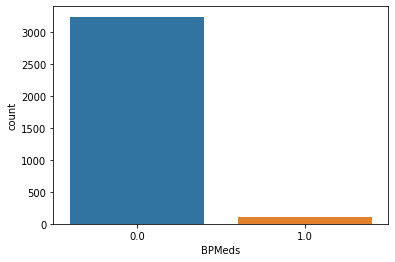

In [1083]:
# showing countplot of blood pressure mediacation column and its value counts
plt.figure(figsize=(6,4))
sns.countplot(df['BPMeds'])
df['BPMeds'].value_counts()

In [1084]:
# Replacing null values of Blood pressure medication status column with mean
df['BPMeds'] = df['BPMeds'].fillna(df['BPMeds'].mode()[0]).astype('int64')

0    3359
1      22
Name: prevalentStroke, dtype: int64

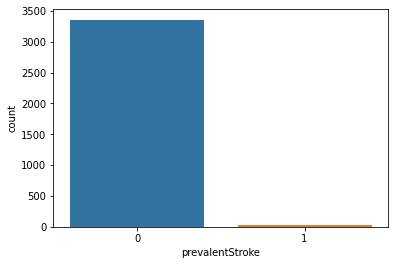

In [1085]:
# showing countplot of prevalent stroke status (previous stroke status) column and its value counts
plt.figure(figsize=(6,4))
sns.countplot(df['prevalentStroke'])
df['prevalentStroke'].value_counts()

0    2316
1    1065
Name: prevalentHyp, dtype: int64

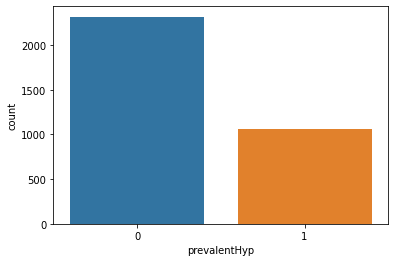

In [1086]:
# showing countplot of prevalent hypertensiv status (previous hypertensiv status) column and its value counts
plt.figure(figsize=(6,4))
sns.countplot(df['prevalentHyp'])
df['prevalentHyp'].value_counts()

0    3294
1      87
Name: diabetes, dtype: int64

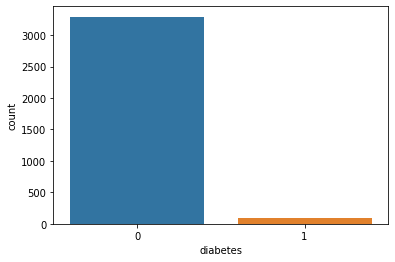

In [1087]:
# showing countplot of diabetes status (0 = 'NO' and 1 = 'YES') and its value counts
plt.figure(figsize=(6,4))
sns.countplot(df['diabetes'])
df['diabetes'].value_counts()

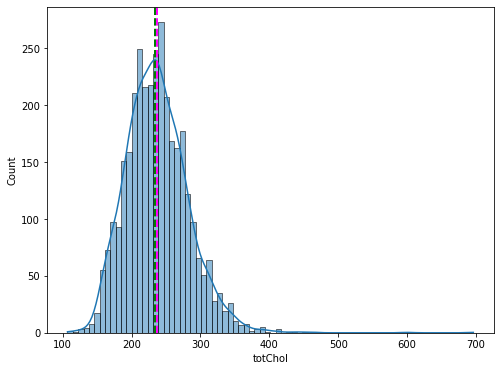

In [1088]:
# total cholestrol column distribution, mean and median line in histogram plot
plt.figure(figsize=(8,6))
ax = sns.histplot(df['totChol'],kde=True)
ax.axvline(df['totChol'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(df['totChol'].median(), color='green', linestyle='dashed', linewidth=2)

In [1089]:
# Replacing null values of total cholestrol column with median
df.totChol =df.totChol.fillna(df.totChol.median())

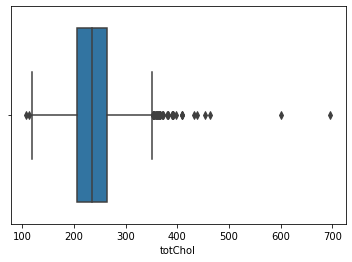

In [1090]:
# checking outliers of total cholestrol column through boxplot
sns.boxplot(df['totChol'])

In [1091]:
# Checking outliers of total cholestrol column through IQR, upper fence and lower fence 
iqr = np.percentile(df['totChol'],75) - np.percentile(df['totChol'],25)
upper_fence = np.percentile(df['totChol'],75) + (1.5*iqr)
lower_fence = np.percentile(df['totChol'],25) - (1.5*iqr)
print(iqr)
print(upper_fence)
print(lower_fence)

58.0
351.0
119.0


In [1092]:
# droping index values above upper fence and below lower fence
df.drop(df.index[df['totChol']>351],inplace=True)
df.drop(df.index[df['totChol']<119],inplace=True)

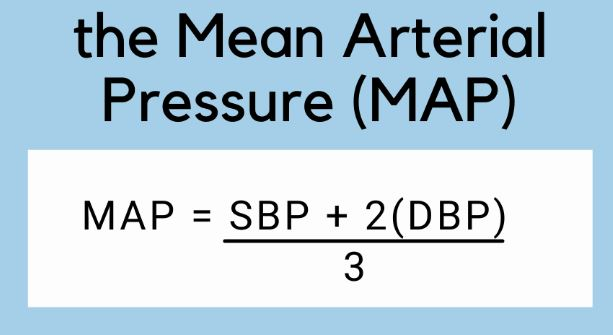

In [1093]:
# Combining systolic and diastolic blood pressure column through formula 
df['map']=round((df['sysBP']+2*df['diaBP'])/3,3) # calculating mean arterial pressure and storing in seperate column

# droping systolic and diastolic blood pressure column
df.drop(['sysBP','diaBP'],axis=1,inplace=True)

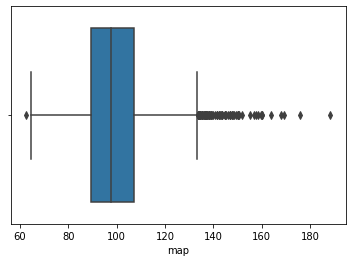

In [1094]:
# checking outliers of mean arterial pressure column through boxplot
sns.boxplot(df['map'])

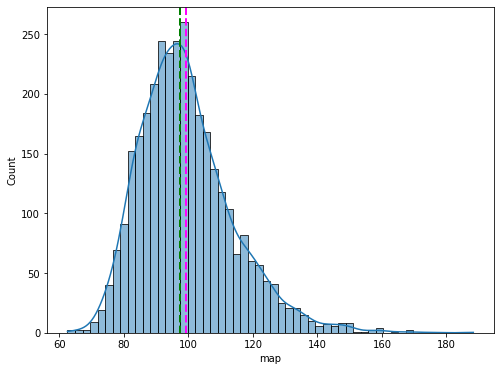

In [1095]:
# Mean arterial pressure (map) column distribution, mean and median line in histogram plot
plt.figure(figsize=(8,6))
ax = sns.histplot(df['map'],kde=True)
ax.axvline(df['map'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(df['map'].median(), color='green', linestyle='dashed', linewidth=2)

In [1096]:
# Checking outliers of Mean arterial pressure (map) column through IQR, upper fence and lower fence 
iqr = np.percentile(df['map'],75) - np.percentile(df['map'],25)
upper_fence = np.percentile(df['map'],75) + (1.5*iqr)
lower_fence = np.percentile(df['map'],25) - (1.5*iqr)
print(iqr)
print(upper_fence)
print(lower_fence)

17.667
133.5005
62.832499999999996


In [1097]:
# droping index values above upper fence and below lower fence
df.drop(df.index[df['map']>133.5005],inplace=True)
df.drop(df.index[df['map']<62.8324],inplace=True)

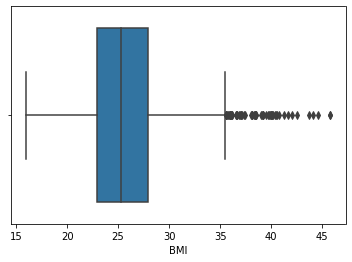

In [1098]:
# checking outliers of Body mass index (BMI) column through boxplot
sns.boxplot(df['BMI'])

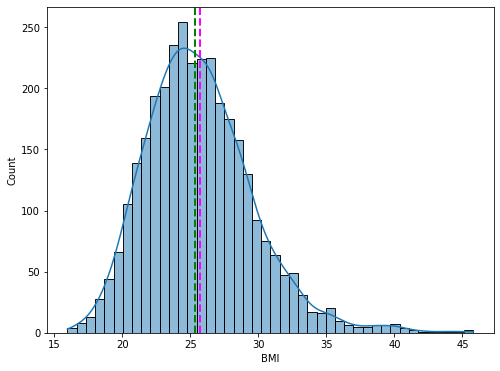

In [1099]:
# Body mass index (BMI) column distribution, mean and median line in histogram plot
plt.figure(figsize=(8,6))
ax = sns.histplot(df['BMI'],kde=True)
ax.axvline(df['BMI'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(df['BMI'].median(), color='green', linestyle='dashed', linewidth=2)

In [1100]:
# Replacing null values of Body mass index (BMI) column with mean
df['BMI']=df.BMI.fillna(df['BMI'].mean())

In [1101]:
# Checking outliers of Body mass index (BMI) column through IQR, upper fence and lower fence 
iqr = np.percentile(df['BMI'],75) - np.percentile(df['BMI'],25)
upper_fence = np.percentile(df['BMI'],75) + (1.5*iqr)
lower_fence = np.percentile(df['BMI'],25) - (1.5*iqr)
print(iqr)
print(upper_fence)
print(lower_fence)

5.02
35.47
15.390000000000002


In [1102]:
# droping index values of BMI column above upper fence and below lower fence
df.drop(df.index[df['BMI']>35.47],inplace=True)
df.drop(df.index[df['BMI']<15.39],inplace=True)

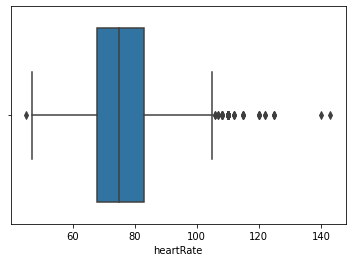

In [1103]:
# checking outliers of Heart rate column through boxplot
sns.boxplot(df['heartRate'])

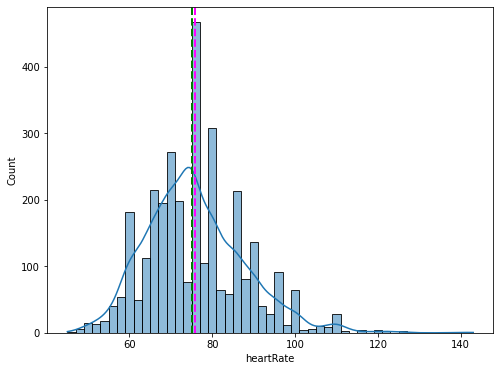

In [1104]:
# Heart rate column distribution, mean and median line in histogram plot
plt.figure(figsize=(8,6))
ax = sns.histplot(df['heartRate'],kde=True)
ax.axvline(df['heartRate'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(df['heartRate'].median(), color='green', linestyle='dashed', linewidth=2)

In [1105]:
# Replacing null values of Heart rate column with mean
df['heartRate']=df.heartRate.fillna(df['heartRate'].mean())

In [1106]:
# Checking outliers of Heart rate column through IQR, upper fence and lower fence 
iqr = np.percentile(df['heartRate'],75) - np.percentile(df['heartRate'],25)
upper_fence = np.percentile(df['heartRate'],75) + (1.5*iqr)
lower_fence = np.percentile(df['heartRate'],25) - (1.5*iqr)
print(iqr)
print(upper_fence)
print(lower_fence)

15.0
105.5
45.5


In [1107]:
# droping index values of BMI column above upper fence and below lower fence
df.drop(df.index[df['heartRate']>105.5],inplace=True)
df.drop(df.index[df['heartRate']<45.5],inplace=True)

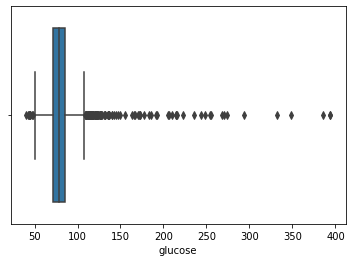

In [1108]:
# checking outliers of glucose column through boxplot
sns.boxplot(df['glucose'])

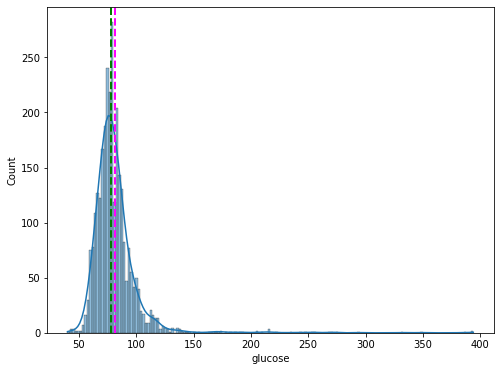

In [1109]:
# Glucose column distribution, mean and median line in histogram plot
plt.figure(figsize=(8,6))
ax = sns.histplot(df['glucose'],kde=True)
ax.axvline(df['glucose'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(df['glucose'].median(), color='green', linestyle='dashed', linewidth=2)

In [1110]:
# Replacing null values of Glucose column with mean
df['glucose']=df.glucose.fillna(df['glucose'].mean())

In [1111]:
# Checking outliers of glucose column through IQR, upper fence and lower fence 
iqr = np.percentile(df['glucose'],75) - np.percentile(df['glucose'],25)
upper_fence = np.percentile(df['glucose'],75) + (1.5*iqr)
lower_fence = np.percentile(df['glucose'],25) - (1.5*iqr)
print(iqr)
print(upper_fence)
print(lower_fence)

13.0
104.5
52.5


In [1112]:
# droping index values of Glucose column above upper fence and below lower fence
df.drop(df.index[df['glucose']>104.5],inplace=True)
df.drop(df.index[df['glucose']<52.5],inplace=True)

In [1113]:
# checking dataset describe
df.describe()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD,map
count,2943.000000,2943.000000,2943.000000,2943.000000,2943.000000,2943.000000,2943.000000,2943.000000,2943.000000,2943.000000,2943.000000,2943.000000,2943.000000,2943.000000
mean,49.095821,1.559633,0.505267,9.143476,0.021407,0.005437,0.273530,0.005437,234.417261,25.392585,74.868746,78.257185,0.133877,97.547625
std,8.514533,0.496516,0.500057,11.587114,0.144760,0.073545,0.445846,0.073545,40.840621,3.504720,10.781351,9.912973,0.340578,12.448470
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,119.000000,16.480000,47.000000,53.000000,0.000000,64.500000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,205.000000,22.905000,67.000000,72.000000,0.000000,88.500000
50%,48.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,233.000000,25.160000,75.000000,78.000000,0.000000,96.667000
75%,56.000000,2.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,261.000000,27.690000,81.000000,84.000000,0.000000,105.167000
max,70.000000,2.000000,1.000000,50.000000,1.000000,1.000000,1.000000,1.000000,351.000000,35.450000,105.000000,104.000000,1.000000,133.333000


In [1114]:
# checking information of dataset after feature engineering
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2943 entries, 0 to 3389
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              2943 non-null   int64  
 1   sex              2943 non-null   int64  
 2   is_smoking       2943 non-null   int64  
 3   cigsPerDay       2943 non-null   float64
 4   BPMeds           2943 non-null   int64  
 5   prevalentStroke  2943 non-null   int64  
 6   prevalentHyp     2943 non-null   int64  
 7   diabetes         2943 non-null   int64  
 8   totChol          2943 non-null   float64
 9   BMI              2943 non-null   float64
 10  heartRate        2943 non-null   float64
 11  glucose          2943 non-null   float64
 12  TenYearCHD       2943 non-null   int64  
 13  map              2943 non-null   float64
dtypes: float64(6), int64(8)
memory usage: 344.9 KB


In [1115]:
df.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD,map
0,64,2,1,3.0,0,0,0,0,221.0,25.675664,90.0,80.0,1,106.000
1,36,1,0,0.0,0,0,1,0,212.0,29.770000,72.0,75.0,0,121.333
2,46,2,1,10.0,0,0,0,0,250.0,20.350000,88.0,94.0,0,86.000
3,50,1,1,20.0,0,0,1,0,233.0,28.260000,68.0,94.0,1,111.333
4,64,2,1,30.0,0,0,0,0,241.0,26.420000,70.0,77.0,0,102.167


In [1116]:
# checking duplicate index in dataset
df[df.duplicated()].shape 

(0, 14)

0    2549
1     394
Name: TenYearCHD, dtype: int64

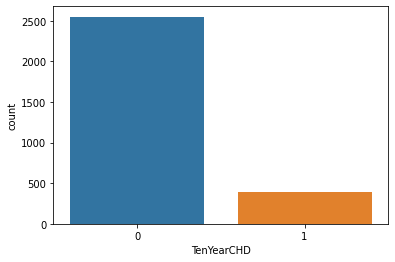

In [1117]:
# Showing count plot of target variable (10-year risk of future coronary heart disease) and its value counts
plt.figure(figsize=(6,4))
sns.countplot(df['TenYearCHD'])
df['TenYearCHD'].value_counts()

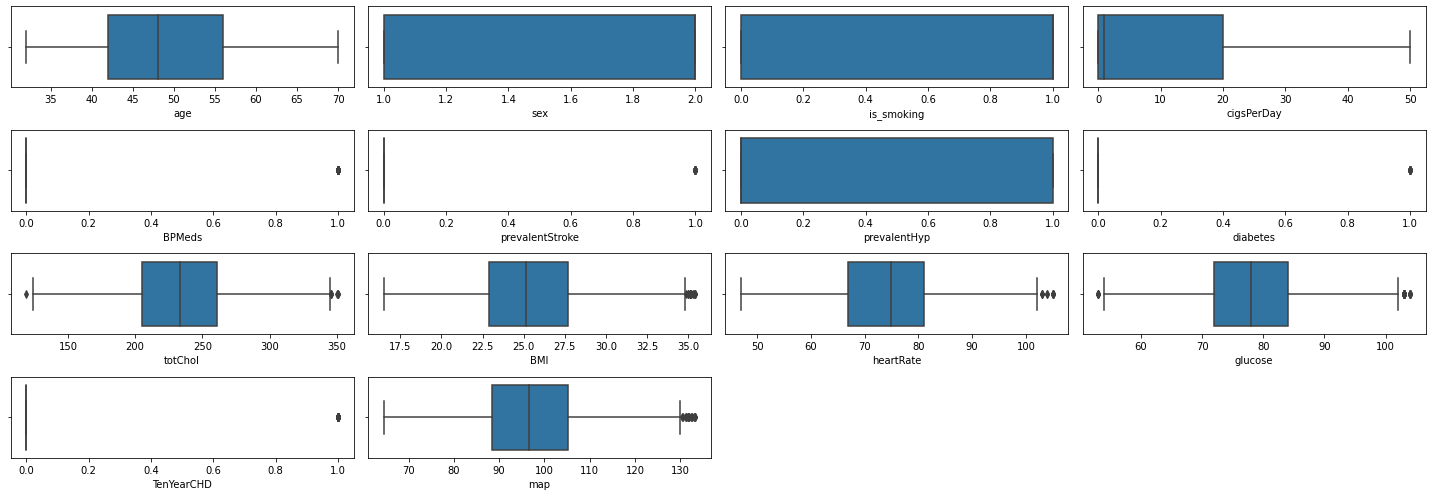

In [1118]:
# looking for outliers of every fearture of dataset with the help of boxplot after treating null values and outliers
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
plt.figure(figsize = (20, 10))
num_it = 1 

for col in df.describe().columns:
    plt.subplot(6,4,num_it)
    sns.boxplot(df[col])
    num_it+=1
    
plt.tight_layout()